# Deep Learning for Image Classification using a CNN

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

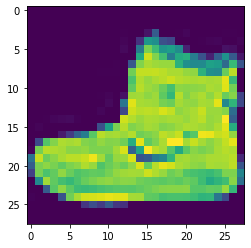

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

9

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000,28,28,1)

In [11]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_cat_train = to_categorical(y_train)

In [15]:
y_cat_test = to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers.**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 1,189,770
Trainable params: 1,189,770
Non-trainable params: 0
______________________________________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set.**

In [19]:
model.fit(x_train,
          y_cat_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_test, y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 667us/sample - loss: 0.4747 - accuracy: 0.8321 - val_loss: 0.3950 - val_accuracy: 0.8588
Epoch 2/10
60000/60000 [==============================] - 38s 631us/sample - loss: 0.3068 - accuracy: 0.8887 - val_loss: 0.2979 - val_accuracy: 0.8913
Epoch 3/10
60000/60000 [==============================] - 38s 633us/sample - loss: 0.2604 - accuracy: 0.9055 - val_loss: 0.2964 - val_accuracy: 0.8896
Epoch 4/10
60000/60000 [==============================] - 39s 644us/sample - loss: 0.2296 - accuracy: 0.9149 - val_loss: 0.2812 - val_accuracy: 0.8990
Epoch 5/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.2050 - accuracy: 0.9242 - val_loss: 0.2592 - val_accuracy: 0.9053
Epoch 6/10
60000/60000 [==============================] - 38s 641us/sample - loss: 0.1836 - accuracy: 0.9323 - val_loss: 0.2664 - val_accuracy: 0.9076
Epoch 7/10
60000/60000 [====================

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [20]:
model.metrics_names

['loss', 'accuracy']

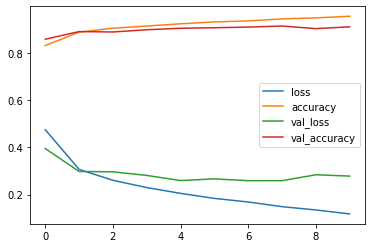

In [21]:
losses= pd.DataFrame(model.history.history)
losses.plot()

In [22]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 256us/sample - loss: 0.2783 - accuracy: 0.9114


[0.27827312465310095, 0.9114]

In [23]:
from sklearn.metrics import classification_report

In [24]:
predictions = model.predict_classes(x_test)

In [25]:
y_cat_test.shape

(10000, 10)

In [26]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
predictions[0]

9

In [28]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.96      0.85      0.90      1000
           4       0.81      0.91      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.74      0.78      0.76      1000
           7       0.98      0.95      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Great Job!